In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions
library(data.table)
library(dplyr)
library(mice)
## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: lattice


Attaching package: ‘mice’


The following object is masked from ‘package:tidyr’:

    complete


The following objects are masked from ‘package:base’:

    cbind, rbind




[1] "microsoft-malware-prediction"

In [2]:
data_path = "../input/microsoft-malware-prediction/"
train = data.frame(fread(paste0(data_path, "train.csv"))) %>%
    mutate(HasDetections = factor(HasDetections))
#test = data.frame(fread(paste0(data_path, "test.csv")))
dim(train)

[1] 8921483      83

In [3]:
head(train)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,⋯,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7,0,NA,53447,⋯,36144,0,NA,0,0,0,0,0,10,0
2,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7,0,NA,53447,⋯,57858,0,NA,0,0,0,0,0,8,0
3,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7,0,NA,53447,⋯,52682,0,NA,0,0,0,0,0,3,0
4,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7,0,NA,53447,⋯,20050,0,NA,0,0,0,0,0,3,1
5,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7,0,NA,53447,⋯,19844,0,0,0,0,0,0,0,1,1
6,000016191b897145d069102325cab760,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7,0,NA,53447,⋯,51039,0,0,0,0,0,0,0,15,1


In [4]:
n=nrow(train)

In [5]:
### Check for null or missing values
cbind(sort(colSums(is.na(train))/nrow(train),decreasing=TRUE))

DefaultBrowsersIdentifier,0.951416373
Census_IsFlightingInternal,0.830440298
Census_ThresholdOptIn,0.635244723
Census_IsWIMBootEnabled,0.634390381
OrganizationIdentifier,0.308414868
SMode,0.060276862
CityIdentifier,0.036474765
Wdft_IsGamer,0.034013515
Wdft_RegionIdentifier,0.034013515
Census_InternalBatteryNumberOfCharges,0.030124476
Census_FirmwareManufacturerIdentifier,0.020541092


DefaultBrowsersIdentifier	0.951416373
Census_IsFlightingInternal	0.830440298
Census_ThresholdOptIn	0.635244723
Census_IsWIMBootEnabled	0.63439038

These variables can be removed as the missing percentage is too high to even impute and get some information. Let us look at unique values.


In [6]:
### Check for constants
data_uniques<-as.data.frame(sapply(train,function(x) length(unique(x))))
data_uniques <- tibble::rownames_to_column(data_uniques, "COLNAMES")      

In [7]:
colnames(data_uniques)[2]<-"uniq"
data_uniques

COLNAMES,uniq
<chr>,<int>
MachineIdentifier,8921483
ProductName,6
EngineVersion,70
AppVersion,110
AvSigVersion,8531
IsBeta,2
RtpStateBitfield,8
IsSxsPassiveMode,2
DefaultBrowsersIdentifier,2018


In [8]:
data_uniques %>% arrange(uniq)

COLNAMES,uniq
<chr>,<int>
IsBeta,2
IsSxsPassiveMode,2
HasTpm,2
AutoSampleOptIn,2
Census_HasOpticalDiskDrive,2
Census_IsPortableOperatingSystem,2
Census_IsSecureBootEnabled,2
Census_IsTouchEnabled,2
Census_IsPenCapable,2


IsBeta	2
IsSxsPassiveMode	2
HasTpm	2
AutoSampleOptIn	2
Census_HasOpticalDiskDrive	2
Census_IsPortableOperatingSystem	2
Census_IsSecureBootEnabled	2
Census_IsTouchEnabled	2
Census_IsPenCapable	2
HasDetections	2


Most of them are logicals which means they will have only 2 values.

In [9]:
# class imbalance
table(train$HasDetections)/nrow(train)


        0         1 
0.5002073 0.4997927 

There is no problem of class imbalance- 0: 50% and 1: 49.9%

In [10]:
unique_df = train %>%
    summarise_all(funs(n_distinct(.))) %>%
    gather(var, unique_count)

Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session.”


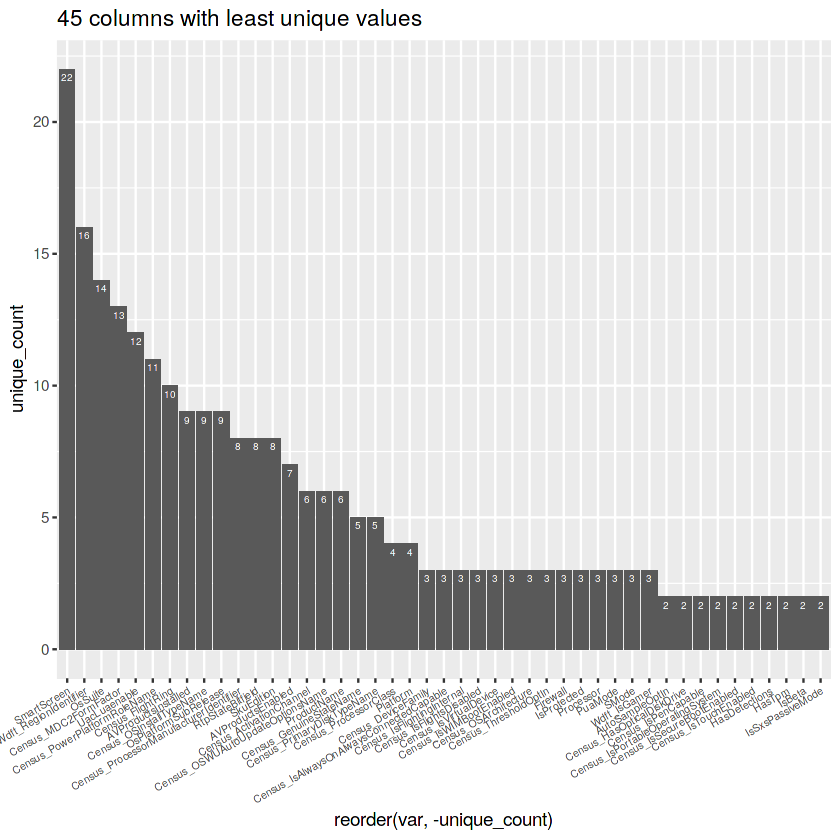

In [11]:
bottom_x = 45

unique_df %>%
    top_n(-bottom_x, wt = unique_count) %>%
    ggplot(aes(x = reorder(var, -unique_count), y = unique_count)) +
    geom_col() +
    geom_text(aes(label = unique_count), vjust = 1.5, color = "white", size = 2) +
    theme(axis.text.x = element_text(angle = 30, size = 6, vjust = 1, hjust = 1)) +
    labs(title = paste(bottom_x, "columns with least unique values"))

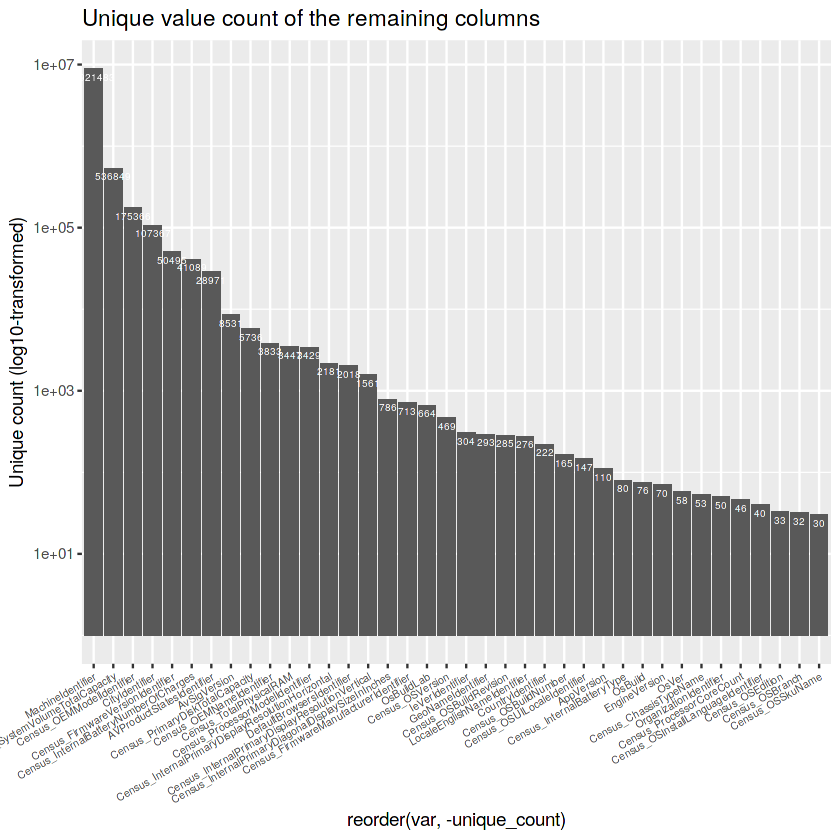

In [12]:
unique_df_bottom_x = unique_df %>%
    top_n(-bottom_x, wt = unique_count) %>%
    pull(var)

unique_df %>%
    filter(var %in% setdiff(.$var, unique_df_bottom_x)) %>%
    ggplot(aes(x = reorder(var, -unique_count), y = unique_count)) +
    geom_col() +
    geom_text(aes(label = unique_count), vjust = 1.5, color = "white", size = 2) +
    theme(axis.text.x = element_text(angle = 30, size = 6, vjust = 1, hjust = 1)) +
    scale_y_log10() +
    labs(title = "Unique value count of the remaining columns"
        , y = "Unique count (log10-transformed)")

In [13]:
get_top_2_freqs = function(vec) {
    table(vec) %>%
        sort(decreasing = T) %>%
        head(2) %>%
        as.data.frame() %>%
        mutate(rank = c("first","second")) %>%
        select(rank, Freq) %>%
        spread(rank, Freq)
}

y_col = "HasDetections"

less_than_11_uniques = unique_df %>%
    filter(unique_count <= 10) %>%
    pull(var) %>%
    setdiff(y_col)


In [14]:
top_freq_ratio_df = lapply(less_than_11_uniques, function(col) {
    train[, col] %>%
        get_top_2_freqs() %>%
        mutate(variable = col)
    }) %>%
    do.call(bind_rows, .) %>%
    select(variable, first, second) %>%
    mutate(freq_ratio = first / second) %>%
    arrange(desc(freq_ratio))

In [15]:
missing_df = train %>%
    summarise_all(funs(sum(is.na(.)) / n * 100)) %>%
    gather(var, missing_pctg) 

top_freq_ratio_df %>%
    left_join(unique_df, by = c("variable" = "var")) %>%
    left_join(missing_df, by = c("variable" = "var"))

variable,first,second,freq_ratio,unique_count,missing_pctg
<chr>,<int>,<int>,<dbl>,<int>,<dbl>
Census_IsWIMBootEnabled,3261779,1,3.261779e+06,3,63.4390381
IsBeta,8921416,67,1.331555e+05,2,0.0000000
Census_IsFlightsDisabled,8760872,88,9.955536e+04,3,1.7992861
Census_IsFlightingInternal,1512703,21,7.203348e+04,3,83.0440298
AutoSampleOptIn,8921225,258,3.457839e+04,2,0.0000000
Census_ThresholdOptIn,3253342,816,3.986939e+03,3,63.5244723
PuaMode,8919174,2307,3.866135e+03,3,0.0000000
SMode,8379843,3881,2.159197e+03,3,6.0276862
Census_IsPortableOperatingSystem,8916619,4864,1.833186e+03,2,0.0000000


we will only remove variables that have freq_ratio > 98 and missing_pctg < 5.

In [16]:
rem_miss = top_freq_ratio_df %>%
    left_join(unique_df, by = c("variable" = "var")) %>%
    left_join(missing_df, by = c("variable" = "var")) %>%
    filter(freq_ratio > 98
          , missing_pctg < 5) %>%
    pull(variable)

cat("Variables to remove:\n")
cat(paste(rem_miss, collapse = ", "))

Variables to remove:
IsBeta, Census_IsFlightsDisabled, AutoSampleOptIn, PuaMode, Census_IsPortableOperatingSystem, Census_DeviceFamily, Census_ProcessorClass, Census_IsVirtualDevice

In [17]:
drop1<- unique(append(rem_miss,c('DefaultBrowsersIdentifier','Census_IsFlightingInternal','Census_ThresholdOptIn','Census_IsWIMBootEnabled')))
drop1
#train2<-train[ , !(names(train) %in% drop1)]
#dim(train2)

[1] "IsBeta"                           "Census_IsFlightsDisabled"        
 [3] "AutoSampleOptIn"                  "PuaMode"                         
 [5] "Census_IsPortableOperatingSystem" "Census_DeviceFamily"             
 [7] "Census_ProcessorClass"            "Census_IsVirtualDevice"          
 [9] "DefaultBrowsersIdentifier"        "Census_IsFlightingInternal"      
[11] "Census_ThresholdOptIn"            "Census_IsWIMBootEnabled"

In [18]:
#length(unique(train$MachineIdentifier))

All values in Machine Identifier are unique. We can treat that column separately. It defines the level of the dataset.

In [19]:
#test = data.frame(fread(paste0(data_path, "test.csv")))

In [20]:
# random sample of train
set.seed(1000)

trainsample = train %>%
    sample_n(30000)

In [21]:
# random sample of train
#set.seed(7500)

#trainsample2 = train %>%
    #sample_n(75000)

In [22]:
trainsample<-trainsample[ , !(names(trainsample) %in% drop1)]
dim(trainsample)

[1] 30000    71

In [23]:
character_cols = trainsample %>%
    select_if(function(x) !is.numeric(x)) %>%
    select(-MachineIdentifier) %>%
    select(-HasDetections)%>%
    colnames() 
#character_cols
ordinal_cols = c("AVProductsInstalled", "AVProductsEnabled", "RtpStateBitfield", "OsBuild"
                 , "OsSuite", "Census_OSBuildNumber", "Census_OSBuildRevision")

numeric_cols = c("Census_ProcessorCoreCount", "Census_PrimaryDiskTotalCapacity"
                 , "Census_SystemVolumeTotalCapacity", "Census_TotalPhysicalRAM"
                 , "Census_InternalPrimaryDiagonalDisplaySizeInInches"
                 , "Census_InternalPrimaryDisplayResolutionHorizontal"
                 , "Census_InternalPrimaryDisplayResolutionVertical"
                 , "Census_InternalBatteryNumberOfCharges")

In [24]:
cor(trainsample[numeric_cols])

,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges
Census_ProcessorCoreCount,1,NA,NA,NA,NA,NA,NA,NA
Census_PrimaryDiskTotalCapacity,NA,1,NA,NA,NA,NA,NA,NA
Census_SystemVolumeTotalCapacity,NA,NA,1,NA,NA,NA,NA,NA
Census_TotalPhysicalRAM,NA,NA,NA,1,NA,NA,NA,NA
Census_InternalPrimaryDiagonalDisplaySizeInInches,NA,NA,NA,NA,1,NA,NA,NA
Census_InternalPrimaryDisplayResolutionHorizontal,NA,NA,NA,NA,NA,1,NA,NA
Census_InternalPrimaryDisplayResolutionVertical,NA,NA,NA,NA,NA,NA,1,NA
Census_InternalBatteryNumberOfCharges,NA,NA,NA,NA,NA,NA,NA,1


corrplot 0.84 loaded



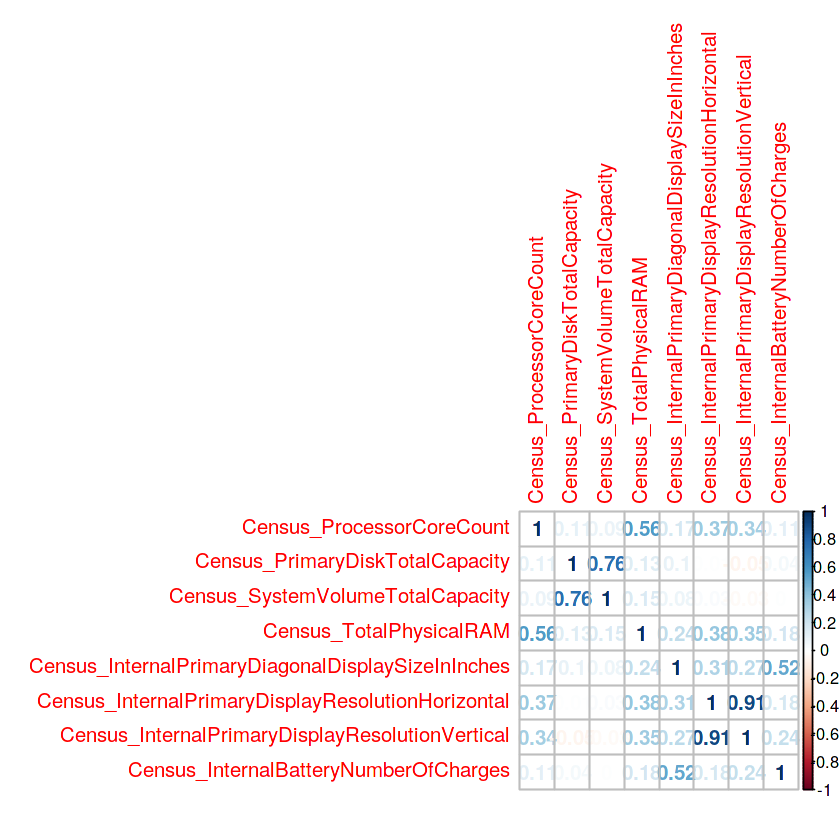

In [25]:
library(corrplot)
corrplot_1 <- cor(trainsample[numeric_cols],use="complete.obs")
corrplot(corrplot_1, method = "number")

In [26]:
names(trainsample)

[1] "MachineIdentifier"                                
 [2] "ProductName"                                      
 [3] "EngineVersion"                                    
 [4] "AppVersion"                                       
 [5] "AvSigVersion"                                     
 [6] "RtpStateBitfield"                                 
 [7] "IsSxsPassiveMode"                                 
 [8] "AVProductStatesIdentifier"                        
 [9] "AVProductsInstalled"                              
[10] "AVProductsEnabled"                                
[11] "HasTpm"                                           
[12] "CountryIdentifier"                                
[13] "CityIdentifier"                                   
[14] "OrganizationIdentifier"                           
[15] "GeoNameIdentifier"                                
[16] "LocaleEnglishNameIdentifier"                      
[17] "Platform"                                         
[18] "Processor"                                        
[19] "OsVer"                                            
[20] "OsBuild"                                          
[21] "OsSuite"                                          
[22] "OsPlatformSubRelease"                             
[23] "OsBuildLab"                                       
[24] "SkuEdition"                                       
[25] "IsProtected"                                      
[26] "SMode"                                            
[27] "IeVerIdentifier"                                  
[28] "SmartScreen"                                      
[29] "Firewall"                                         
[30] "UacLuaenable"                                     
[31] "Census_MDC2FormFactor"                            
[32] "Census_OEMNameIdentifier"                         
[33] "Census_OEMModelIdentifier"                        
[34] "Census_ProcessorCoreCount"                        
[35] "Census_ProcessorManufacturerIdentifier"           
[36] "Census_ProcessorModelIdentifier"                  
[37] "Census_PrimaryDiskTotalCapacity"                  
[38] "Census_PrimaryDiskTypeName"                       
[39] "Census_SystemVolumeTotalCapacity"                 
[40] "Census_HasOpticalDiskDrive"                       
[41] "Census_TotalPhysicalRAM"                          
[42] "Census_ChassisTypeName"                           
[43] "Census_InternalPrimaryDiagonalDisplaySizeInInches"
[44] "Census_InternalPrimaryDisplayResolutionHorizontal"
[45] "Census_InternalPrimaryDisplayResolutionVertical"  
[46] "Census_PowerPlatformRoleName"                     
[47] "Census_InternalBatteryType"                       
[48] "Census_InternalBatteryNumberOfCharges"            
[49] "Census_OSVersion"                                 
[50] "Census_OSArchitecture"                            
[51] "Census_OSBranch"                                  
[52] "Census_OSBuildNumber"                             
[53] "Census_OSBuildRevision"                           
[54] "Census_OSEdition"                                 
[55] "Census_OSSkuName"                                 
[56] "Census_OSInstallTypeName"                         
[57] "Census_OSInstallLanguageIdentifier"               
[58] "Census_OSUILocaleIdentifier"                      
[59] "Census_OSWUAutoUpdateOptionsName"                 
[60] "Census_GenuineStateName"                          
[61] "Census_ActivationChannel"                         
[62] "Census_FlightRing"                                
[63] "Census_FirmwareManufacturerIdentifier"            
[64] "Census_FirmwareVersionIdentifier"                 
[65] "Census_IsSecureBootEnabled"                       
[66] "Census_IsTouchEnabled"                            
[67] "Census_IsPenCapable"                              
[68] "Census_IsAlwaysOnAlwaysConnectedCapable"          
[69] "Wdft_IsGamer"                                     
[70] "Wdft_RegionIdentifier"                            
[71] "HasDe

In [27]:
idnames<- names(trainsample)[grepl( "Identifier" , names(trainsample))]
idnames

[1] "MachineIdentifier"                     
 [2] "AVProductStatesIdentifier"             
 [3] "CountryIdentifier"                     
 [4] "CityIdentifier"                        
 [5] "OrganizationIdentifier"                
 [6] "GeoNameIdentifier"                     
 [7] "LocaleEnglishNameIdentifier"           
 [8] "IeVerIdentifier"                       
 [9] "Census_OEMNameIdentifier"              
[10] "Census_OEMModelIdentifier"             
[11] "Census_ProcessorManufacturerIdentifier"
[12] "Census_ProcessorModelIdentifier"       
[13] "Census_OSInstallLanguageIdentifier"    
[14] "Census_OSUILocaleIdentifier"           
[15] "Census_FirmwareManufacturerIdentifier" 
[16] "Census_FirmwareVersionIdentifier"      
[17] "Wdft_RegionIdentifier"

Removing the language and geographical locations identifiers

In [28]:
drop2<- c("CountryIdentifier","CityIdentifier","GeoNameIdentifier","LocaleEnglishNameIdentifier","Wdft_RegionIdentifier")
trainsample<-trainsample[ , !(names(trainsample) %in% drop2)]
dim(trainsample)

[1] 30000    66

In [29]:
idnames<- names(trainsample)[grepl( "Identifier" , names(trainsample))]
idnames

[1] "MachineIdentifier"                     
 [2] "AVProductStatesIdentifier"             
 [3] "OrganizationIdentifier"                
 [4] "IeVerIdentifier"                       
 [5] "Census_OEMNameIdentifier"              
 [6] "Census_OEMModelIdentifier"             
 [7] "Census_ProcessorManufacturerIdentifier"
 [8] "Census_ProcessorModelIdentifier"       
 [9] "Census_OSInstallLanguageIdentifier"    
[10] "Census_OSUILocaleIdentifier"           
[11] "Census_FirmwareManufacturerIdentifier" 
[12] "Census_FirmwareVersionIdentifier"

Adding a few cols to boolean

In [30]:
table(trainsample$UacLuaenable)
trainsample$UacLuaenable <- ifelse(trainsample$UacLuaenable == 48,NA, trainsample$UacLuaenable )
table(trainsample$UacLuaenable)


    0     1    48 
  204 29749     1 


    0     1 
  204 29749 

In [31]:
boolnames<- names(trainsample)[grepl( "Is|Has" , names(trainsample))]
boolnames<-c(boolnames,c("SMode","UacLuaenable","Firewall"))
boolnames

[1] "IsSxsPassiveMode"                       
 [2] "HasTpm"                                 
 [3] "IsProtected"                            
 [4] "Census_HasOpticalDiskDrive"             
 [5] "Census_IsSecureBootEnabled"             
 [6] "Census_IsTouchEnabled"                  
 [7] "Census_IsPenCapable"                    
 [8] "Census_IsAlwaysOnAlwaysConnectedCapable"
 [9] "Wdft_IsGamer"                           
[10] "HasDetections"                          
[11] "SMode"                                  
[12] "UacLuaenable"                           
[13] "Firewall"

In [32]:
#rm(train)
names(trainsample[,-which(names(trainsample)==c("MachineIdentifier","HasDetections"))])

[1] "ProductName"                                      
 [2] "EngineVersion"                                    
 [3] "AppVersion"                                       
 [4] "AvSigVersion"                                     
 [5] "RtpStateBitfield"                                 
 [6] "IsSxsPassiveMode"                                 
 [7] "AVProductStatesIdentifier"                        
 [8] "AVProductsInstalled"                              
 [9] "AVProductsEnabled"                                
[10] "HasTpm"                                           
[11] "OrganizationIdentifier"                           
[12] "Platform"                                         
[13] "Processor"                                        
[14] "OsVer"                                            
[15] "OsBuild"                                          
[16] "OsSuite"                                          
[17] "OsPlatformSubRelease"                             
[18] "OsBuildLab"                                       
[19] "SkuEdition"                                       
[20] "IsProtected"                                      
[21] "SMode"                                            
[22] "IeVerIdentifier"                                  
[23] "SmartScreen"                                      
[24] "Firewall"                                         
[25] "UacLuaenable"                                     
[26] "Census_MDC2FormFactor"                            
[27] "Census_OEMNameIdentifier"                         
[28] "Census_OEMModelIdentifier"                        
[29] "Census_ProcessorCoreCount"                        
[30] "Census_ProcessorManufacturerIdentifier"           
[31] "Census_ProcessorModelIdentifier"                  
[32] "Census_PrimaryDiskTotalCapacity"                  
[33] "Census_PrimaryDiskTypeName"                       
[34] "Census_SystemVolumeTotalCapacity"                 
[35] "Census_HasOpticalDiskDrive"                       
[36] "Census_TotalPhysicalRAM"                          
[37] "Census_ChassisTypeName"                           
[38] "Census_InternalPrimaryDiagonalDisplaySizeInInches"
[39] "Census_InternalPrimaryDisplayResolutionHorizontal"
[40] "Census_InternalPrimaryDisplayResolutionVertical"  
[41] "Census_PowerPlatformRoleName"                     
[42] "Census_InternalBatteryType"                       
[43] "Census_InternalBatteryNumberOfCharges"            
[44] "Census_OSVersion"                                 
[45] "Census_OSArchitecture"                            
[46] "Census_OSBranch"                                  
[47] "Census_OSBuildNumber"                             
[48] "Census_OSBuildRevision"                           
[49] "Census_OSEdition"                                 
[50] "Census_OSSkuName"                                 
[51] "Census_OSInstallTypeName"                         
[52] "Census_OSInstallLanguageIdentifier"               
[53] "Census_OSUILocaleIdentifier"                      
[54] "Census_OSWUAutoUpdateOptionsName"                 
[55] "Census_GenuineStateName"                          
[56] "Census_ActivationChannel"                         
[57] "Census_FlightRing"                                
[58] "Census_FirmwareManufacturerIdentifier"            
[59] "Census_FirmwareVersionIdentifier"                 
[60] "Census_IsSecureBootEnabled"                       
[61] "Census_IsTouchEnabled"                            
[62] "Census_IsPenCapable"                              
[63] "Census_IsAlwaysOnAlwaysConnectedCapable"          
[64] "Wdft_IsGamer"

In [33]:
factor_vars<-c(character_cols,ordinal_cols,boolnames,idnames)
factor_vars

trainsample[factor_vars] <- lapply(trainsample[factor_vars], as.factor)  

[1] "ProductName"                            
 [2] "EngineVersion"                          
 [3] "AppVersion"                             
 [4] "AvSigVersion"                           
 [5] "Platform"                               
 [6] "Processor"                              
 [7] "OsVer"                                  
 [8] "OsPlatformSubRelease"                   
 [9] "OsBuildLab"                             
[10] "SkuEdition"                             
[11] "SmartScreen"                            
[12] "Census_MDC2FormFactor"                  
[13] "Census_PrimaryDiskTypeName"             
[14] "Census_ChassisTypeName"                 
[15] "Census_PowerPlatformRoleName"           
[16] "Census_InternalBatteryType"             
[17] "Census_OSVersion"                       
[18] "Census_OSArchitecture"                  
[19] "Census_OSBranch"                        
[20] "Census_OSEdition"                       
[21] "Census_OSSkuName"                       
[22] "Census_OSInstallTypeName"               
[23] "Census_OSWUAutoUpdateOptionsName"       
[24] "Census_GenuineStateName"                
[25] "Census_ActivationChannel"               
[26] "Census_FlightRing"                      
[27] "AVProductsInstalled"                    
[28] "AVProductsEnabled"                      
[29] "RtpStateBitfield"                       
[30] "OsBuild"                                
[31] "OsSuite"                                
[32] "Census_OSBuildNumber"                   
[33] "Census_OSBuildRevision"                 
[34] "IsSxsPassiveMode"                       
[35] "HasTpm"                                 
[36] "IsProtected"                            
[37] "Census_HasOpticalDiskDrive"             
[38] "Census_IsSecureBootEnabled"             
[39] "Census_IsTouchEnabled"                  
[40] "Census_IsPenCapable"                    
[41] "Census_IsAlwaysOnAlwaysConnectedCapable"
[42] "Wdft_IsGamer"                           
[43] "HasDetections"                          
[44] "SMode"                                  
[45] "UacLuaenable"                           
[46] "Firewall"                               
[47] "MachineIdentifier"                      
[48] "AVProductStatesIdentifier"              
[49] "OrganizationIdentifier"                 
[50] "IeVerIdentifier"                        
[51] "Census_OEMNameIdentifier"               
[52] "Census_OEMModelIdentifier"              
[53] "Census_ProcessorManufacturerIdentifier" 
[54] "Census_ProcessorModelIdentifier"        
[55] "Census_OSInstallLanguageIdentifier"     
[56] "Census_OSUILocaleIdentifier"            
[57] "Census_FirmwareManufacturerIdentifier"  
[58] "Census_FirmwareVersionIdentifier"

In [34]:
cols.keep <- c("Census_PrimaryDiskTotalCapacity",
               "Census_SystemVolumeTotalCapacity",
               "MachineIdentifier",
               "HasDetections")
for(colName in colnames(trainsample)) {
  if(!(colName %in% cols.keep)) {
    trainsample[[colName]] <- as.factor(trainsample[[colName]])
  }
}

In [35]:
#train_imp <- mice(trainsample,m=10,defaultMethod=c("pmm","logreg","polyreg","polr"),print=F)
for(colName in colnames(trainsample[, factor_vars])) {
  if(!(colName %in% cols.keep)) {
    trainsample[[colName]] <- factor(ifelse(!is.na(trainsample[[colName]]),
                                         as.character(trainsample[[colName]]),
                                         "Missing"))
  }
}

In [36]:
### Check for null or missing values
cbind(sort(colSums(is.na(trainsample))/nrow(trainsample),decreasing=TRUE))

Census_InternalBatteryNumberOfCharges,0.030866667
Census_TotalPhysicalRAM,0.008533333
Census_InternalPrimaryDiagonalDisplaySizeInInches,0.006066667
Census_InternalPrimaryDisplayResolutionHorizontal,0.006066667
Census_InternalPrimaryDisplayResolutionVertical,0.006066667
Census_PrimaryDiskTotalCapacity,0.005400000
Census_SystemVolumeTotalCapacity,0.005400000
Census_ProcessorCoreCount,0.004066667
MachineIdentifier,0.000000000
ProductName,0.000000000
EngineVersion,0.000000000


In [37]:
trainsample[] <- lapply(trainsample, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
cbind(sort(colSums(is.na(trainsample))/nrow(trainsample),decreasing=TRUE))

Warning message in mean.default(x, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(x, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(x, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(x, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(x, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(x, na.rm = TRUE):
“argument is not numeric or logical: returning NA”


Census_InternalBatteryNumberOfCharges,0.030866667
Census_TotalPhysicalRAM,0.008533333
Census_InternalPrimaryDiagonalDisplaySizeInInches,0.006066667
Census_InternalPrimaryDisplayResolutionHorizontal,0.006066667
Census_InternalPrimaryDisplayResolutionVertical,0.006066667
Census_ProcessorCoreCount,0.004066667
MachineIdentifier,0.000000000
ProductName,0.000000000
EngineVersion,0.000000000
AppVersion,0.000000000
AvSigVersion,0.000000000


In [38]:
class(trainsample$IsProtected)

[1] "integer"

In [39]:
table(trainsample$Census_OSInstallTypeName)


   1    2    3    4    5    6    7    8    9 
 220  180 5616 2857  648 2253 5306 4133 8787 

In [40]:
#trainsample[factor_vars] <- lapply(trainsample[factor_vars], as.factor) 
trainsample$IsProtected<- as.factor(trainsample$IsProtected)
trainsample$Census_OSInstallTypeName<- as.factor(trainsample$Census_OSInstallTypeName)
trainsample$Wdft_IsGamer<- as.factor(trainsample$Wdft_IsGamer)

In [41]:
# based on correlation plot
drop3<- c("Census_ProcessorCoreCount", "Census_PrimaryDiskTotalCapacity","Census_InternalPrimaryDisplayResolutionHorizontal"
                 , "Census_InternalPrimaryDisplayResolutionVertical")
trainsample<-trainsample[ , !(names(trainsample) %in% drop3)]

In [42]:
dim(trainsample)

[1] 30000    62

Some EDA plots

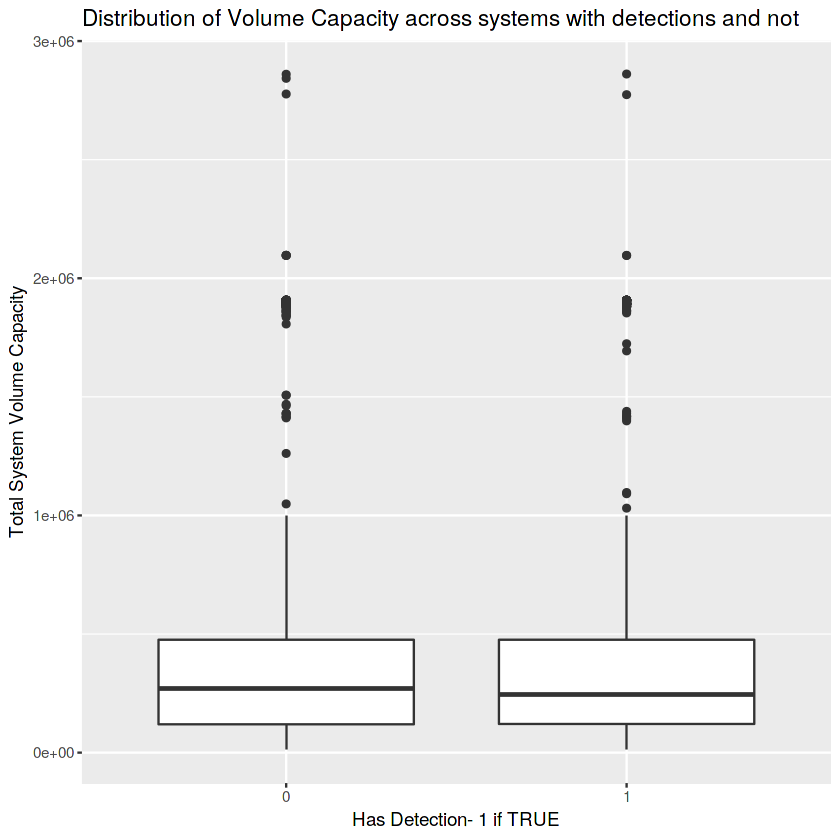

In [43]:
trainsample %>%
  ggplot(aes(x = as.factor(HasDetections-1), y = Census_SystemVolumeTotalCapacity)) +
  geom_boxplot() +
  xlab("Has Detection- 1 if TRUE") +
  ylab("Total System Volume Capacity") +
  ggtitle("Distribution of Volume Capacity across systems with detections and not") 

In [44]:
chisq.test(table(trainsample[,c("Census_OSInstallTypeName","IsProtected")]))

Warning message in chisq.test(table(trainsample[, c("Census_OSInstallTypeName", :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(trainsample[, c("Census_OSInstallTypeName", "IsProtected")])
X-squared = 299.75, df = 16, p-value < 2.2e-16


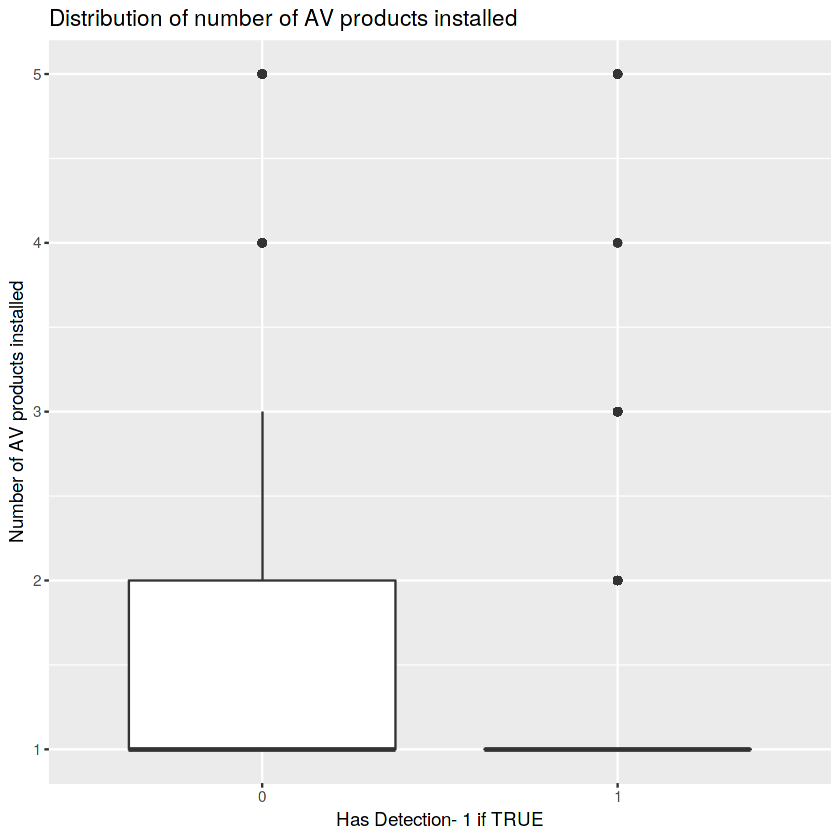

In [45]:
trainsample %>%
  ggplot(aes(x = as.factor(HasDetections-1), y = AVProductsInstalled)) +
  geom_boxplot() +
  xlab("Has Detection- 1 if TRUE") +
  ylab("Number of AV products installed") +
  ggtitle("Distribution of number of AV products installed") 

In [46]:
chisq.test(table(trainsample[,c("Census_OSInstallTypeName","HasDetections")]))


	Pearson's Chi-squared test

data:  table(trainsample[, c("Census_OSInstallTypeName", "HasDetections")])
X-squared = 67.794, df = 8, p-value = 1.349e-11


In [47]:
chisq.test(table(trainsample[,c("Wdft_IsGamer","HasDetections")]))


	Pearson's Chi-squared test

data:  table(trainsample[, c("Wdft_IsGamer", "HasDetections")])
X-squared = 106.69, df = 2, p-value < 2.2e-16


In [48]:
dim(trainsample)

[1] 30000    62

In [49]:
mod1<- glm(as.factor(HasDetections-1) ~ ., data = trainsample, family = binomial)
summary(mod1)


Call:
glm(formula = as.factor(HasDetections - 1) ~ ., family = binomial, 
    data = trainsample)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9274  -1.1457   0.7436   1.1005   2.1266  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                       -9.441e-02  1.073e+00  -0.088
MachineIdentifier                                  8.074e-09  1.403e-06   0.006
ProductName                                       -7.286e-01  6.080e-01  -1.198
EngineVersion                                      9.151e-03  6.508e-03   1.406
AppVersion                                        -1.505e-04  2.222e-03  -0.068
AvSigVersion                                       3.060e-05  5.024e-05   0.609
RtpStateBitfield                                   1.388e-01  4.209e-02   3.297
IsSxsPassiveMode                                   3.907e-01  1.920e-01   2.035
AVProductStatesIdentifier                         -8

In [50]:
nrow(trainsample)/8921483

[1] 0.00336267

In [51]:
saveRDS(mod1,"mod1.RDS")

Most significant factor is AVProductsInstalled, followed by Wdft_IsGamer. 

In [52]:
confint.default(mod1)   #on log odds scale
exp(confint.default(mod1)) #on odds scale

,2.5 %,97.5 %
(Intercept),-2.196701e+00,2.007878e+00
MachineIdentifier,-2.741363e-06,2.757510e-06
ProductName,-1.920149e+00,4.630121e-01
EngineVersion,-3.603614e-03,2.190660e-02
AppVersion,-4.505196e-03,4.204221e-03
AvSigVersion,-6.787310e-05,1.290743e-04
RtpStateBitfield,5.629021e-02,2.212665e-01
IsSxsPassiveMode,1.431526e-02,7.670237e-01
AVProductStatesIdentifier,-2.446681e-04,7.210767e-05
AVProductsInstalled,-7.172618e-01,-6.076805e-01


,2.5 %,97.5 %
(Intercept),0.11116927,7.4474991
MachineIdentifier,0.99999726,1.0000028
ProductName,0.14658507,1.5888525
EngineVersion,0.99640287,1.0221483
AppVersion,0.99550494,1.0042131
AvSigVersion,0.99993213,1.0001291
RtpStateBitfield,1.05790466,1.2476559
IsSxsPassiveMode,1.01441821,2.1533477
AVProductStatesIdentifier,0.99975536,1.0000721
AVProductsInstalled,0.48808689,0.5446127


In [53]:
drop_insig<- c("RtpStateBitfield","UacLuaenable","IsSxsPassiveMode","Census_OSVersion","Census_OSBranch","Census_OSBuildNumber","Census_OSBuildRevision","AvSigVersion","AVProductStatesIdentifier","AppVersion","OsPlatformSubRelease","Census_OEMNameIdentifier","Census_OEMModelIdentifier","Census_FirmwareManufacturerIdentifier","Census_OSInstallLanguageIdentifier")
trainsample<-trainsample[ , !(names(trainsample) %in% drop_insig)]

In [54]:
mod2<- glm(as.factor(HasDetections-1) ~ ., data = trainsample, family = binomial)
summary(mod2)


Call:
glm(formula = as.factor(HasDetections - 1) ~ ., family = binomial, 
    data = trainsample)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8117  -1.1475   0.7519   1.1020   2.2203  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                        5.598e-01  7.883e-01   0.710
MachineIdentifier                                 -8.441e-08  1.402e-06  -0.060
ProductName                                       -2.866e-01  3.972e-01  -0.722
EngineVersion                                      1.174e-02  3.979e-03   2.951
AVProductsInstalled                               -6.660e-01  2.650e-02 -25.131
AVProductsEnabled                                 -2.696e-01  8.726e-02  -3.089
HasTpm                                             2.256e-01  3.086e-01   0.731
OrganizationIdentifier                             4.974e-04  1.059e-03   0.470
Platform                                          -1

In [55]:
drop_insig2<- c("Census_ActivationChannel","Census_FirmwareVersionIdentifier")
trainsample<-trainsample[ , !(names(trainsample) %in% drop_insig2)]

In [56]:
mod3<- glm(as.factor(HasDetections-1) ~ ., data = trainsample, family = binomial)
summary(mod3)


Call:
glm(formula = as.factor(HasDetections - 1) ~ ., family = binomial, 
    data = trainsample)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8135  -1.1476   0.7501   1.1019   2.2241  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                        6.019e-01  7.832e-01   0.769
MachineIdentifier                                 -9.032e-08  1.402e-06  -0.064
ProductName                                       -2.856e-01  3.971e-01  -0.719
EngineVersion                                      1.171e-02  3.978e-03   2.945
AVProductsInstalled                               -6.668e-01  2.640e-02 -25.256
AVProductsEnabled                                 -2.688e-01  8.724e-02  -3.081
HasTpm                                             2.252e-01  3.086e-01   0.730
OrganizationIdentifier                             4.895e-04  1.059e-03   0.462
Platform                                          -1

In [57]:
dim(trainsample)

[1] 30000    45

In [58]:
drop_list=c(drop1,drop2,drop3,drop_insig,drop_insig2)
drop_list

[1] "IsBeta"                                           
 [2] "Census_IsFlightsDisabled"                         
 [3] "AutoSampleOptIn"                                  
 [4] "PuaMode"                                          
 [5] "Census_IsPortableOperatingSystem"                 
 [6] "Census_DeviceFamily"                              
 [7] "Census_ProcessorClass"                            
 [8] "Census_IsVirtualDevice"                           
 [9] "DefaultBrowsersIdentifier"                        
[10] "Census_IsFlightingInternal"                       
[11] "Census_ThresholdOptIn"                            
[12] "Census_IsWIMBootEnabled"                          
[13] "CountryIdentifier"                                
[14] "CityIdentifier"                                   
[15] "GeoNameIdentifier"                                
[16] "LocaleEnglishNameIdentifier"                      
[17] "Wdft_RegionIdentifier"                            
[18] "Census_ProcessorCoreCount"                        
[19] "Census_PrimaryDiskTotalCapacity"                  
[20] "Census_InternalPrimaryDisplayResolutionHorizontal"
[21] "Census_InternalPrimaryDisplayResolutionVertical"  
[22] "RtpStateBitfield"                                 
[23] "UacLuaenable"                                     
[24] "IsSxsPassiveMode"                                 
[25] "Census_OSVersion"                                 
[26] "Census_OSBranch"                                  
[27] "Census_OSBuildNumber"                             
[28] "Census_OSBuildRevision"                           
[29] "AvSigVersion"                                     
[30] "AVProductStatesIdentifier"                        
[31] "AppVersion"                                       
[32] "OsPlatformSubRelease"                             
[33] "Census_OEMNameIdentifier"                         
[34] "Census_OEMModelIdentifier"                        
[35] "Census_FirmwareManufacturerIdentifier"            
[36] "Census_OSInstallLanguageIdentifier"               
[37] "Census_ActivationChannel"                         
[38] "Census_FirmwareVersionIdentifier"

In [59]:
# random sample of train
set.seed(7500)

trainsample2 = train %>%
    sample_n(75000)

trainsample2<-trainsample2[ , !(names(trainsample2) %in% drop_list)]

In [60]:
dim(trainsample2)

[1] 75000    45

In [61]:
write.csv(trainsample2,"train.csv" ,row.names = FALSE)